Importing Necessary Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataframe using pandas read_csv function

In [6]:
# reading the data
df=pd.read_csv('/content/shrink_ray_dataset.csv')
df


,Power,Shrinkage
0,0.00,0.00
1,1.51,0.00
2,3.02,0.00
3,4.52,2.67
4,6.03,0.00
...,...,...
195,293.97,89.62
196,295.48,94.92
197,296.98,88.65
198,298.49,90.79


Splitting the data

In [15]:
# x represents the shrinkage which is not the target
# y represents the knob(power) which is the target that we are trying to predict
df.columns = df.columns.str.strip()
x=df.drop(['Power'],axis=1)
y=df['Power']
print(x.shape)
print(y.shape)


(200, 1)
(200,)


In [17]:
# Then we split the data into 60% training set and 20% testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(40, 1)
(40,)


Create Linear regression model

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# train the model
model.fit(x_train,y_train)

Predict the knob value for the desired shrinkage percentage:

In [56]:
desired_percentage = 85
predicted_knob = model.predict([[desired_percentage]])
print("The predicted knob for the shrinkage percentage of %d%% is %.2f MW" % (desired_percentage,predicted_knob))

The predicted knob for the shrinkage percentage of 85% is 271.99 MW


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Plot the dataset as scatter plot and also plot the linear model in the
same chart

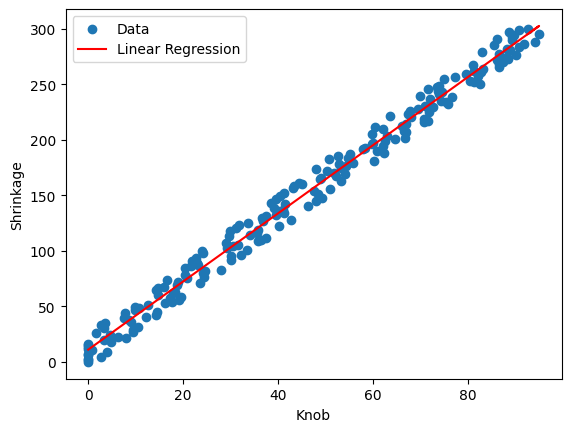

In [64]:
plt.scatter(x, y, label='Data')
plt.plot(x, model.predict(x), color='red', label='Linear Regression')
plt.xlabel('Knob')
plt.ylabel('Shrinkage')
plt.legend()
plt.show()